In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dogs_cats_sample_1000/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_datagen=ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dogs_cats_sample_1000/valid',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [6]:
from tensorflow.keras.regularizers import l2

In [7]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
# Binary classification
cnn.add(Dense(1,kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])
r=cnn.fit(x=training_set,validation_data=test_set,epochs=15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 806s 12s/step - accuracy: 0.5028 - loss: 1.0267 - val_accuracy: 0.5010 - val_loss: 0.9748
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 578ms/step - accuracy: 0.5286 - loss: 0.9358 - val_accuracy: 0.6310 - val_loss: 0.8609
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 666ms/step - accuracy: 0.6098 - loss: 0.8212 - val_accuracy: 0.6645 - val_loss: 0.7976
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 698ms/step - accuracy: 0.6385 - loss: 0.7938 - val_accuracy: 0.6505 - val_loss: 0.7736
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 562ms/step - accuracy: 0.6822 - loss: 0.7232 - val_accuracy: 0.6710 - val_loss: 0.7839
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 552ms/step - accuracy: 0.6879 - loss: 0.7018 - val_accuracy: 0.6770 - val_loss: 0.7698
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 572ms/step - accuracy: 0.6817 - loss: 0.7043 - val_accuracy: 0.6780 - val_loss: 0.7752
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 544ms/step - accuracy: 0.6866 - loss: 0.6998 - val_accuracy: 0.6925

In [9]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,439,653 (9.31 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626,436 (6.20 MB)

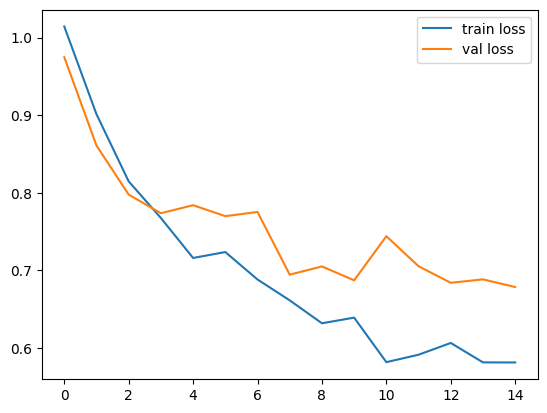

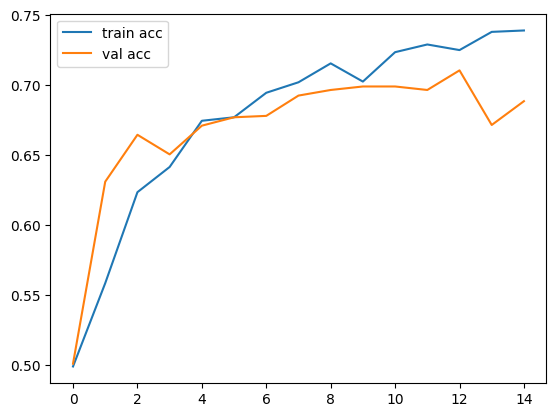

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
from tensorflow.keras.models import load_model
cnn.save('model_rcat_dog.h5')

In [13]:
from tensorflow.keras.models import load_model
cnn=load_model('model_rcat_dog.h5')

In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image=image.load_img('/content/drive/MyDrive/dogs_cats_sample_1000/valid/dogs/dog.10171.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [32]:
result

array([[404.47858]], dtype=float32)

In [24]:
test_image=image.load_img('/content/drive/MyDrive/dogs_cats_sample_1000/valid/cats/cat.10038.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [20]:
result

array([[-653.85315]], dtype=float32)

In [33]:
if result[0]<0:
    prediction='cat'
else:
    prediction='dog'

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
print(prediction)

dog
